# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multi-output ANN (iris dataset)
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

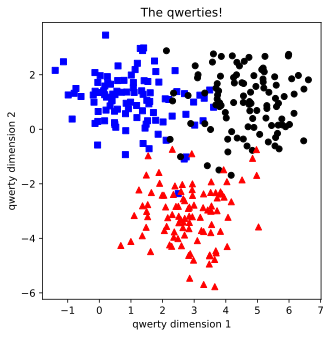

In [2]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]
C = [  3, -3 ]

# generate data
a = [ A[0] + np.random.randn(nPerClust) * blur , A[1] + np.random.randn(nPerClust) * blur ]
b = [ B[0] + np.random.randn(nPerClust) * blur , B[1] + np.random.randn(nPerClust) * blur ]
c = [ C[0] + np.random.randn(nPerClust) * blur , C[1] + np.random.randn(nPerClust) * blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)),
                       np.ones((nPerClust, 1)),
                       np.full((nPerClust, 1), 2)))

# concatanate into a matrix
data_np = np.hstack((a, b, c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1], 'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Create the ANN model

In [3]:
# model architecture
ANNq = nn.Sequential(
    nn.Linear(2, 16),    # input layer
    nn.ReLU(),          # activation
    nn.Linear(16, 3),    # output layer
    nn.Softmax(dim = 1) # final activation function
)

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNq.parameters(), lr = .01)

In [4]:
# test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)
print(yHat)

torch.Size([300, 2])
torch.Size([300, 3])
tensor([[0.2304, 0.2439, 0.5257],
        [0.2815, 0.2551, 0.4634],
        [0.2461, 0.2886, 0.4653],
        [0.2389, 0.2976, 0.4635],
        [0.2949, 0.2231, 0.4821],
        [0.2317, 0.2471, 0.5212],
        [0.2179, 0.2820, 0.5001],
        [0.2364, 0.2429, 0.5207],
        [0.2590, 0.2956, 0.4454],
        [0.2022, 0.2769, 0.5208],
        [0.2206, 0.2942, 0.4852],
        [0.2447, 0.2735, 0.4817],
        [0.5323, 0.2847, 0.1829],
        [0.2232, 0.2834, 0.4934],
        [0.3267, 0.3131, 0.3602],
        [0.2541, 0.3229, 0.4229],
        [0.2691, 0.3194, 0.4115],
        [0.2925, 0.2393, 0.4682],
        [0.2846, 0.2473, 0.4682],
        [0.2379, 0.3077, 0.4543],
        [0.2390, 0.2904, 0.4706],
        [0.1795, 0.2627, 0.5579],
        [0.2688, 0.2875, 0.4437],
        [0.2954, 0.1496, 0.5550],
        [0.2833, 0.2432, 0.4734],
        [0.2069, 0.2683, 0.5248],
        [0.2660, 0.2389, 0.4951],
        [0.2385, 0.2927, 0.4689],
      

# Train the model

In [5]:
numepochs = 10000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):

  # forward pass
  yHat = ANNq(data)

  # compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat, axis = 1) == labels # booleans (false / true)
  matchesNumeric = matches.float()                 # convert to numbers (0 / 1)
  accuracyPct = 100 * torch.mean(matchesNumeric)   # average and x100
  ongoingAcc.append(accuracyPct)                   # add to list of accuracies

# final forward pass
predictions = ANNq(data)

predlabels = torch.argmax(predictions, axis = 1)
totalacc = 100 * torch.mean((predlabels == labels).float())

In [6]:
torch.argmax(yHat, axis = 1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

# Visualize the results

Final accuracy: 92.3333%


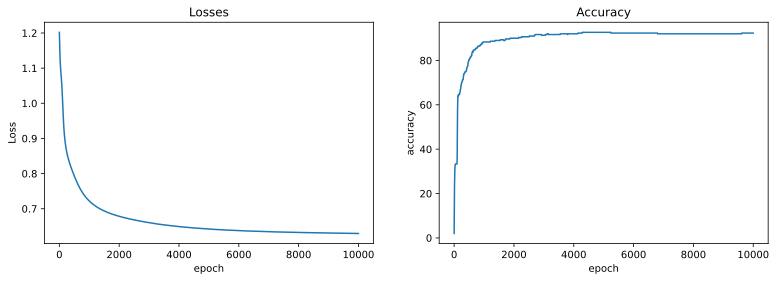

In [7]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1, 2, figsize = (13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [8]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(yHat), axis = 1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

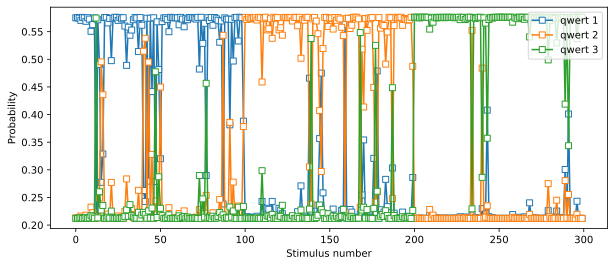

In [9]:
# plot the raw model outputs

fig = plt.figure(figsize = (10, 4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor = 'w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1', 'qwert 2', 'qwert 3'], loc = 'upper right')
plt.show()

# try it again without the softmax!